In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/Emotion Recogition/code/python_files

/content/drive/My Drive/Emotion Recogition/code/python_files


In [0]:
import numpy as np
import os
import sys
import pandas as pd
import librosa

import wave

import keras
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM, Input, Flatten,Dropout,GlobalAveragePooling2D,MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from scipy import signal
import matplotlib.pyplot as plot
from helper import *
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing



Using TensorFlow backend.


In [0]:
from helper import *

In [0]:

code_path = os.path.dirname(os.path.realpath(os.getcwd()))
emotions_used = np.array(['ang', 'exc', 'neu', 'sad'])
data_path = code_path + "/../data/sessions/"
sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
framerate = 16000

In [0]:
import pickle
with open(code_path + '/../data/'+'data_collected.pickle', 'rb') as handle:
    data2 = pickle.load(handle)

In [0]:
sig =data2[20]['signal']

[[ 12.670065   -4.1846743  14.33136   ...   9.410796    0.9310217
    9.265035 ]
 [ 14.847792   10.22954    17.763552  ...  22.938652   17.149147
    5.0173054]
 [ 17.112389   16.532497   14.292474  ...  21.291922   15.8369875
    8.938405 ]
 ...
 [-63.969646  -51.000908  -40.927868  ... -57.89499   -54.12333
  -51.487633 ]
 [-51.470913  -63.915253  -43.351715  ... -51.560246  -51.005592
  -56.289692 ]
 [-53.38153   -57.463394  -51.878227  ... -57.40128   -51.92822
  -60.625404 ]]
[[1.8492962e+01 3.8153341e-01 2.7110403e+01 ... 8.7313147e+00
  1.2390881e+00 8.4431295e+00]
 [3.0533680e+01 1.0542751e+01 5.9752373e+01 ... 1.9672760e+02
  5.1869823e+01 3.1749039e+00]
 [5.1432640e+01 4.5003853e+01 2.6868744e+01 ... 1.3464560e+02
  3.8344120e+01 7.8314195e+00]
 ...
 [4.0089947e-07 7.9416177e-06 8.0763137e-05 ... 1.6236825e-06
  3.8696076e-06 7.0996484e-06]
 [7.1270333e-06 4.0595188e-07 4.6219840e-05 ... 6.9819321e-06
  7.9330630e-06 2.3497994e-06]
 [4.5903626e-06 1.7933328e-06 6.4889919e-06 

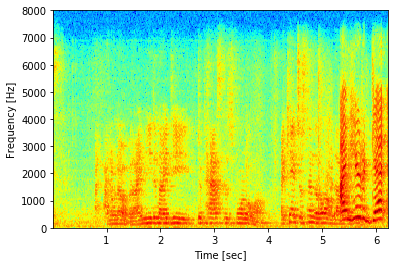

In [0]:
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import preprocessing
sample_rate=16000
freqs, times, spec = signal.spectrogram(sig,fs=sample_rate, window ='hann',nperseg=400,noverlap=200)
log_specgram= 10*np.log10(spec)
#print(log_specgram)
##print(spec)
#log_specgram= np.transpose(log_specgram)
#scaler = preprocessing.StandardScaler()
#scaled_df = scaler.fit_transform(log_specgram)
#log_specgram =scale(log_specgram)
#log_specgram = np.log(spec.T.astype(np.float32) + eps)
#log_specgram =scale(log_specgram)
#og_specgram= np.transpose(scaled_df)
print(log_specgram)
plt.pcolormesh(times, freqs, log_specgram ,cmap ='jet')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
print(spec)


In [0]:
y, sr =librosa.load('SIGNAL003-20kHz.wav')
y_1 = librosa.resample(y, sr, 16000)
n=y[:len(sig)]
n=n-np.mean(n)
n=n/np.sqrt(np.var(n))
vs=np.var(sig)
vn = vs/(np.power(10,(5/10)))#SNR level, here 8dB
n=n*np.sqrt(vn)
nsp=sig+n
nsp=nsp/(max(abs(nsp)*1.01))

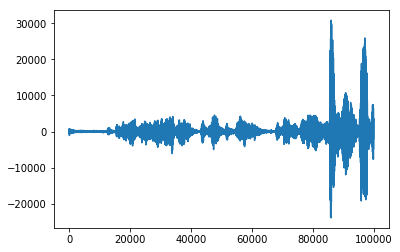

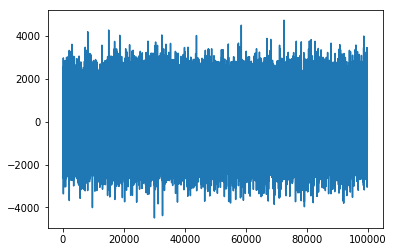

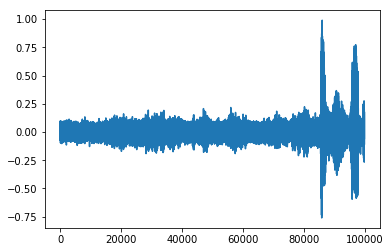

In [0]:
#display original signal
plot.plot(sig)
plot.show()
#display noise signal
plot.plot(n)
plot.show()
#display mixed signal
plot.plot(nsp)
plot.show()

In [0]:


fpath='SIGNAL003-20kHz.wav'
y1, sr1 =librosa.load(fpath)
y_1 = librosa.resample(y1, sr1, 16000)

for filename in os.listdir(folderpath):
        print(filename)
        filepath = folderpath + filename
        y, sr =librosa.load(filepath)
        y_s = librosa.resample(y, sr, 16000)
        sr = 16000
        n=y_1[:len(y_s)]
        n=n-np.mean(n)
        n=n/np.sqrt(np.var(n))
        vs=np.var(y_s)
        vn = vs/(np.power(10,(10/10)))  #SNR level, here 8dB
        n=n*np.sqrt(vn)
        nsp=y_s+n
        nsp=nsp/(max(abs(nsp)*1.01))
        #display original signal
        #plt.plot(y)
        #plt.show()
        #display noise signal
        #plt.plot(n)
        #plt.show()
        #display noisy signal
        #plt.plot(nsp)
        #plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-392013b89fb5>", line 1, in <module>
    get_ipython().magic('cd ..')
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "</usr/local/lib/python3.6/dist-packages/decorator.py:decorator-gen-91>", line 2, in cd
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
FileNotFoundError: [Errno 2] No such file or directory

D

FileNotFoundError: ignored

In [0]:
!pip install python_speech_features

  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav

In [0]:
fbank_feat = logfbank(sig,nfilt=40)
m = np.max(fbank_feat)
fbank_feat = fbank_feat/m
print(fbank_feat.shape)


(623, 40)


In [0]:
fbank_feat.shape

(623, 40)

In [0]:
 from sklearn.preprocessing import scale

In [0]:
fbank_feat=scale(fbank_feat)

In [0]:
print(fbank_feat)

[[-0.36231848 -0.40642797  0.18395666 ... -0.09425247 -0.24077783
   0.03882759]
 [-1.34282408 -1.35102735 -0.46405467 ...  1.00194854  0.56633344
   0.34592493]
 [-0.5215229  -0.99632639 -0.85523199 ...  1.70777654  0.61397265
  -0.02784344]
 ...
 [ 0.31797846  0.28172433 -0.49740342 ...  0.54474821  1.06966615
   0.82438225]
 [ 0.94660694  0.60407244  0.39836822 ...  1.07236844  1.62327617
   1.86826804]
 [ 1.33297573  1.60218931  0.64409929 ...  0.66951627  1.13237355
   0.94239939]]


In [0]:
print(sig)

[   14   -91    68 ...  1017  -718 -2035]


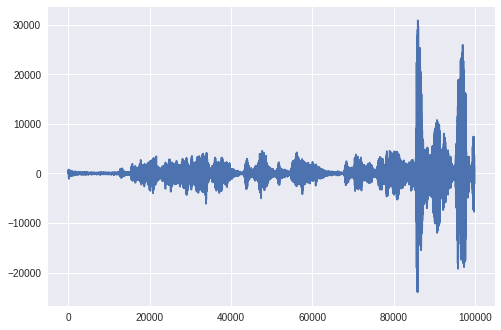

In [0]:
plot.plot(sig)

In [0]:
f,t1,Sxx = signal.spectrogram(sig)

In [0]:
print(Sxx)

[[7.1877234e+04 1.9830625e+04 3.5737422e+03 ... 6.5191633e+04
  1.5159739e+05 4.5779903e+05]
 [9.7296756e+05 1.2901376e+06 8.6952844e+05 ... 1.2121466e+06
  9.9452244e+05 1.7538179e+06]
 [9.1998940e+06 2.8313462e+06 3.3133041e+05 ... 7.7171662e+05
  6.5881019e+05 1.7642160e+06]
 ...
 [3.4898345e-03 2.7146388e-02 5.1334172e-01 ... 7.3019683e-02
  6.0459215e-02 2.3635724e-01]
 [1.3150774e-01 5.2063465e-02 1.2090138e+00 ... 2.0896676e-01
  1.7818034e-01 1.5575356e-02]
 [6.1044022e-02 1.7630722e-04 8.2911010e-04 ... 3.1619354e-03
  1.6713310e-02 3.2833055e-02]]


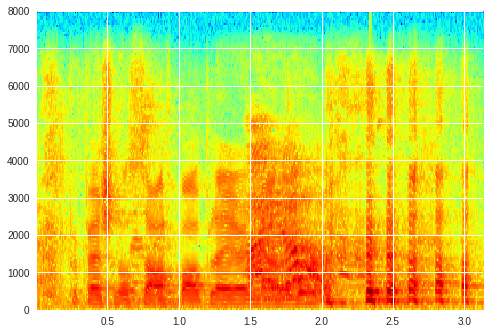

In [0]:
plot.specgram(sig,Fs=16000, cmap ='jet')
plot.show()

In [0]:
X_train = []
X_test = []
Y_train = []
Y_test = []
fs = 16e3
counter = 0
counter1 = 0
for ses_mod in data2:
    if 'impro' in ses_mod['id'] and ses_mod['emotion'] in emotions_used:
        f, t, Sxx = signal.spectrogram(ses_mod['signal'], fs, nperseg=400,noverlap=200)
        Sxx = pad_sequence_into_array(Sxx,maxlen=300,value=0)
        
        if ses_mod['id'][:5]=="Ses05":
            counter+=1
            X_test.append(Sxx)
            Y_test.append(ses_mod['emotion'])
        else:
            counter1+=1
            X_train.append(Sxx)
            Y_train.append(ses_mod['emotion'])
        
print(counter)
print(counter1)

X_test = np.array(X_test)
X_train = np.array(X_train)
print(X_train.shape)
print(X_test.shape)

625
2034
(2034, 201, 300)
(625, 201, 300)


In [0]:
Y_train[0]

'neu'

In [0]:
flag1=0
flag2=0
flag3=0
flag4=0
for i in Y_train:
  if(i=='ang'):
    flag1 = flag1+1
  elif(i=='exc'):
    flag2 = flag2+1
  elif(i=='neu'):
    flag3 = flag3+1
  else:
    flag4 = flag4+1

In [0]:
print(flag1)
print(flag2)
print(flag3)
print(flag4)

258
489
812
475


In [0]:
def lstm_model():
    model = Sequential()
    model.add(LSTM(256, return_sequences=True, input_shape=(201, 300)))
    model.add(LSTM(256, return_sequences=False))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(4))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [0]:
model = lstm_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 201, 256)          570368    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 1,229,316
Trainable params: 1,229,316
Non-trainable para

In [0]:
hist = model.fit(X_train,y_train, 
                 batch_size=32, nb_epoch=40, verbose=1, shuffle = True, 
                 validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 2034 samples, validate on 625 samples
Epoch 1/40
2034/2034 [==============================] - 57s 28ms/step - loss: 1.2499 - acc: 0.4326 - val_loss: 1.1600 - val_acc: 0.4704
Epoch 2/40
2034/2034 [==============================] - 53s 26ms/step - loss: 1.1487 - acc: 0.4936 - val_loss: 1.1249 - val_acc: 0.4864
Epoch 3/40
2034/2034 [==============================] - 53s 26ms/step - loss: 1.0938 - acc: 0.5103 - val_loss: 1.1629 - val_acc: 0.4864
Epoch 4/40
2034/2034 [==============================] - 53s 26ms/step - loss: 1.0491 - acc: 0.5590 - val_loss: 1.1536 - val_acc: 0.4912
Epoch 5/40
2034/2034 [==============================] - 54s 26ms/step - loss: 1.0086 - acc: 0.5831 - val_loss: 1.1460 - val_acc: 0.5056
Epoch 6/40
2034/2034 [==============================] - 54s 26ms/step - loss: 0.9928 - acc: 0.5919 - val_loss: 1.1286 - val_acc: 0.4976
Epoch 7/40
2034/2034 [==============================] - 53s 26ms/step - loss: 0.9415 - acc: 0.6268 - val_loss: 1.1749 - val_acc: 0.5088
E

In [0]:
X_train = X_train.reshape(-1,201,300,1)
X_test = X_test.reshape(-1,201,300,1)

In [0]:
def make_model():
    in_layer = Input(shape=(201, 300,1))
    x = Conv2D(32,(5,5), activation = 'elu')(in_layer)  
    x = Dropout(0.5)(x)
    x = Conv2D(64,(5,5), activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv2D(128, (5,5))(x)                           
    x = GlobalAveragePooling2D()(x)                    
    x = Dense(64,activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(4, activation = "softmax")(x) 
    model = Model(inputs = in_layer, outputs=output_layer)
    return model

In [0]:
model  =  make_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                    metrics=["accuracy"])
hist = model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),nb_epoch=100, verbose=1, shuffle = True, 
                )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 2034 samples, validate on 625 samples
Epoch 1/100


KeyboardInterrupt: ignored

In [0]:
def make_model():
    in_layer = Input(shape=(201, 300,1))
    x = Conv2D(16,(5,5), activation = 'elu')(in_layer)  
    x = Dropout(0.5)(x)
    x = Conv2D(32,(5,5), activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv2D(64, (5,5))(x)                           
    x = GlobalAveragePooling2D()(x)                     
    x = Dense(64,activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(4, activation = "softmax")(x) 
    model = Model(inputs = in_layer, outputs=output_layer)
    return model

In [0]:
model  =  make_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                    metrics=["accuracy"])
hist = model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),nb_epoch=100, verbose=1, shuffle = True, 
                )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 2034 samples, validate on 625 samples
Epoch 1/100
2034/2034 [==============================] - 35s 17ms/step - loss: 5.0466 - acc: 0.4086 - val_loss: 1.8293 - val_acc: 0.2176
Epoch 2/100
2034/2034 [==============================] - 30s 15ms/step - loss: 1.6041 - acc: 0.4149 - val_loss: 1.1262 - val_acc: 0.5040
Epoch 3/100
2034/2034 [==============================] - 30s 15ms/step - loss: 1.2910 - acc: 0.4543 - val_loss: 1.0889 - val_acc: 0.5264
Epoch 4/100
2034/2034 [==============================] - 30s 15ms/step - loss: 1.1510 - acc: 0.4877 - val_loss: 1.0663 - val_acc: 0.5584
Epoch 5/100
2034/2034 [==============================] - 30s 15ms/step - loss: 1.1289 - acc: 0.5010 - val_loss: 1.0708 - val_acc: 0.5648
Epoch 6/100
2034/2034 [==============================] - 30s 15ms/step - loss: 1.1168 - acc: 0.5084 - val_loss: 1.0649 - val_acc: 0.5184
Epoch 7/100
2034/2034 [==============================] - 30s 15ms/step - loss: 1.0890 - acc: 0.5177 - val_loss: 1.0439 - val_acc: 0

In [0]:
def make_model():
    in_layer = Input(shape=(201, 300,1))
    x = Conv2D(32,(5,5), activation = 'elu')(in_layer)  
    x = Dropout(0.5)(x)
    x = Conv2D(64,(5,5), activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv2D(64,(5,5), activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv2D(128, (5,5))(x)                           
    x = GlobalAveragePooling2D()(x)                     
    x = Dense(64,activation='elu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(4, activation = "softmax")(x) # softmax output
    model = Model(inputs = in_layer, outputs=output_layer)
    return model

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 201, 300, 1)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 197, 296, 32)      832       
_________________________________________________________________
dropout_25 (Dropout)         (None, 197, 296, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 193, 292, 64)      51264     
_________________________________________________________________
dropout_26 (Dropout)         (None, 193, 292, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 189, 288, 64)      102464    
_________________________________________________________________
dropout_27 (Dropout)         (None, 189, 288, 64)      0         
__________

In [0]:
model  =  make_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                    metrics=["accuracy"])
m_check = keras.callbacks.ModelCheckpoint(filepath = './cnn_spectrogram.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1 )
hist = model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),nb_epoch=100, verbose=1, shuffle = True,callbacks=[m_check] 
                )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 2034 samples, validate on 625 samples
Epoch 1/100
2034/2034 [==============================] - 102s 50ms/step - loss: 3.6331 - acc: 0.3648 - val_loss: 1.1435 - val_acc: 0.4720

Epoch 00001: val_acc improved from -inf to 0.47200, saving model to ./cnn_spectrogram.h5
Epoch 2/100
2034/2034 [==============================] - 101s 50ms/step - loss: 1.2538 - acc: 0.4695 - val_loss: 1.0985 - val_acc: 0.5216

Epoch 00002: val_acc improved from 0.47200 to 0.52160, saving model to ./cnn_spectrogram.h5
Epoch 3/100
2034/2034 [==============================] - 101s 50ms/step - loss: 1.1979 - acc: 0.4636 - val_loss: 1.1112 - val_acc: 0.5152

Epoch 00003: val_acc did not improve from 0.52160
Epoch 4/100
2034/2034 [==============================] - 101s 50ms/step - loss: 1.1898 - acc: 0.4739 - val_loss: 1.0796 - val_acc: 0.5088

Epoch 00004: val_acc did not improve from 0.52160
Epoch 5/100
2034/2034 [==============================] - 101s 50ms/step - loss: 1.1549 - acc: 0.4848 - val_loss: 1.0

In [0]:
best_model = load_model('./cnn_spectrogram.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
y_pred = best_model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, accuracy_score

In [0]:
for i in range(len(y_pred)):
  for j in range(len(y_pred[i])) :
    if y_pred[i][j]==max(y_pred[i]) :
      y_pred[i][j] = 1
    else:
      y_pred[i][j]=0

In [0]:
print(y_pred)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.45      0.39        31
           1       0.65      0.48      0.55       174
           2       0.65      0.78      0.71       287
           3       0.77      0.64      0.70       133

   micro avg       0.65      0.65      0.65       625
   macro avg       0.60      0.59      0.59       625
weighted avg       0.66      0.65      0.65       625
 samples avg       0.65      0.65      0.65       625



In [0]:
accuracy_score(y_pred, y_test)

0.6512

In [0]:
import tensorflow as tf


def focal_loss(labels, logits, gamma=2.0, alpha=4.0):
    """
    focal loss for multi-classification
    FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
    Notice: logits is probability after softmax
    gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
    d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
    Lin, T.-Y., Goyal, P., Girshick, R., He, K., & Dollár, P. (2017).
    Focal Loss for Dense Object Detection, 130(4), 485–491.
    https://doi.org/10.1016/j.ajodo.2005.02.022
    :param labels: ground truth labels, shape of [batch_size]
    :param logits: model's output, shape of [batch_size, num_cls]
    :param gamma:
    :param alpha:
    :return: shape of [batch_size]
    """
    epsilon = 1.e-9
    labels = tf.to_int64(labels)
    labels = tf.convert_to_tensor(labels, tf.int64)
    logits = tf.convert_to_tensor(logits, tf.float32)
    num_cls = logits.shape[1]

    model_out = tf.add(logits, epsilon)
    onehot_labels = tf.one_hot(labels, num_cls)
    ce = tf.multiply(onehot_labels, -tf.log(model_out))
    weight = tf.multiply(onehot_labels, tf.pow(tf.subtract(1., model_out), gamma))
    fl = tf.multiply(alpha, tf.multiply(weight, ce))
    reduced_fl = tf.reduce_max(fl, axis=1)
    # reduced_fl = tf.reduce_sum(fl, axis=1)  # same as reduce_max
    return reduced_fl

In [0]:
model  =  make_model()
model.compile(optimizer = "adam", loss = focal_loss,
                    metrics=["accuracy"])
m_check = keras.callbacks.ModelCheckpoint(filepath = './cnn_spectrogram1.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1 )
hist = model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),nb_epoch=100, verbose=1, shuffle = True,callbacks=[m_check] 
                )

In [0]:
model = best_model

In [0]:
from keras.models import Model

layer_name = 'global_average_pooling2d_7'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
output_train = intermediate_layer_model.predict(X_train)
output_test =  intermediate_layer_model.predict(X_test)


In [0]:
print(output_train.shape)
print(output_test.shape)
print(y_train.shape)

(2034, 128)
(625, 128)
(2034, 4)


In [0]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(Y_train)
y_test = labelencoder.transform(Y_test)

In [0]:
y_train.shape

(2034,)

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [0]:
xg_model = XGBClassifier(n_estimators=100,learning_rate=0.2,max_depth=7,objective = 'multi:softmax',
                       num_class=4,n_jobs=-1)

In [0]:
xg_model.fit(output_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, num_class=4, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

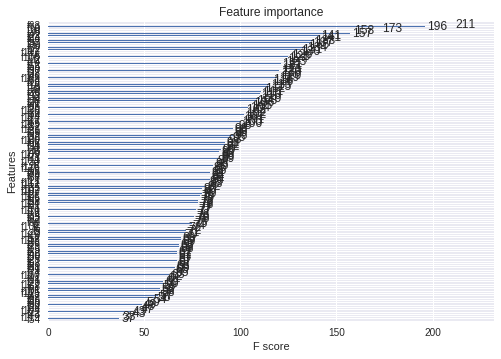

In [0]:
plot_importance(xg_model)
plt.show()

In [0]:
thresholds = np.sort(xg_model.feature_importances_)

In [0]:
# select features using threshold
selection = SelectFromModel(xg_model, threshold=0.005, prefit=True)
X_train = selection.transform(output_train)
X_test = selection.transform(output_test)

In [0]:
xg_model1 = XGBClassifier(n_estimators=100,learning_rate=0.2,max_depth=7,objective = 'multi:softmax',
                       num_class=4,n_jobs=-1)

In [0]:
xg_model1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, num_class=4, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [0]:
y_pred = xg_model1.predict(X_test)

In [0]:
X_train.shape

(2034, 114)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.26      0.22        31
           1       0.64      0.44      0.52       174
           2       0.63      0.69      0.66       287
           3       0.64      0.71      0.67       133

   micro avg       0.60      0.60      0.60       625
   macro avg       0.53      0.52      0.52       625
weighted avg       0.61      0.60      0.60       625



In [0]:
y_pred = xg_model.predict(output_test)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.29      0.26        31
           1       0.62      0.44      0.51       174
           2       0.63      0.68      0.65       287
           3       0.63      0.72      0.67       133

   micro avg       0.60      0.60      0.60       625
   macro avg       0.53      0.53      0.52       625
weighted avg       0.61      0.60      0.60       625



In [0]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,n_jobs=-1)
#classifier.fit(output_train, y_train)

In [0]:
y_pred = classifier.predict(output_test)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.24      0.26      0.25        31
           1       0.63      0.45      0.52       174
           2       0.65      0.72      0.68       287
           3       0.67      0.74      0.70       133

   micro avg       0.63      0.63      0.63       625
   macro avg       0.55      0.54      0.54       625
weighted avg       0.63      0.63      0.62       625



In [0]:
from mlxtend.evaluate import confusion_matrix
m = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=False)
print(m)

In [0]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [80,100,150,200,400]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(output_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [0]:
import pickle
with open(filename, ‘wb’) as f:
    pickle.dump(y_train, f)

SyntaxError: ignored